In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from src.utils.images import plot_matrix, debug, plot_array_matrix
%autosave 60

Autosaving every 60 seconds


In [17]:
size = 54
count = 10000

In [7]:
from src.supervised_gcal.models import get_full_lissom
from src.supervised_gcal.optimizers import SequentialOptimizer, SimpleHebbian, NeighborsDecay
input_shape = (size, size)
epochs = 1

lgn_size=36
lgn_shape = (lgn_size, lgn_size)
sigma_sorround=0.29540/2 *24
sigma_center=0.07385/2 * 24
lgn_radius = 0.375*size
lgn_factor = 2.33
lgn_params = {'sigma_center':sigma_center, 'sigma_sorround':sigma_sorround, 
                'lgn_factor':lgn_factor, 'radius':lgn_radius}

cortex_size = 48
cortex_shape = (cortex_size, cortex_size)
radius_aff = 0.27083 * 24
radius_excit = 0.10417* cortex_size
radius_inhib = 0.22917*cortex_size
aff_factor = 1.0
excit_factor = 0.9
inhib_factor = 0.9
min_theta = 0.083
max_theta = 0.633
v1_params = {'min_theta':min_theta, 'max_theta':max_theta, 
             'afferent_radius':radius_aff, 'excitatory_radius':radius_excit, 'inhibitory_radius':radius_inhib, 
             'inhib_factor':inhib_factor, 'excit_factor':excit_factor, 'aff_factor':aff_factor, 
             'settling_steps':9}


lissom, _, _ = get_full_lissom(input_shape, lgn_shape, cortex_shape, lgn_params=lgn_params, v1_params=v1_params)

aff_lr = 0.9590
exc_lr = 2.55528
inh_lr = 1.80873
optimizer = SequentialOptimizer(
                SimpleHebbian(cortex_layer=lissom.v1, learning_rate=aff_lr, weight='afferent_weights'),
                SimpleHebbian(cortex_layer=lissom.v1, learning_rate=exc_lr, weight='excitatory_weights'),
                SimpleHebbian(cortex_layer=lissom.v1, learning_rate=inh_lr, weight='inhibitory_weights'))

In [24]:
from src.utils.pipeline import Pipeline
from torch.utils.data import Dataset, DataLoader
train_loader = DataLoader(gaussians_inputs, shuffle=True, pin_memory=True)
pipe = Pipeline(lissom, optimizer, cuda=True, log_interval=100)

In [ ]:
from tqdm import tqdm_notebook as tqdm
for epoch in tqdm(range(epochs)):
    pipe.train(train_loader, epoch)

In [ ]:
from src.utils.datasets import CKDataset
size = 96
ck_dataset = CKDataset()
from torch.utils.data import DataLoader
train_loader = DataLoader(ck_dataset, shuffle=True, pin_memory=True)

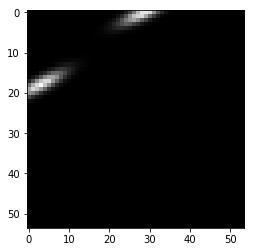

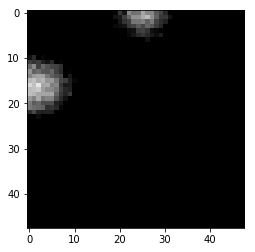

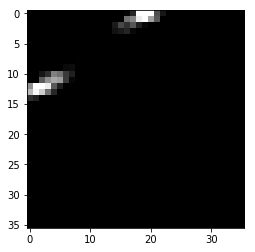

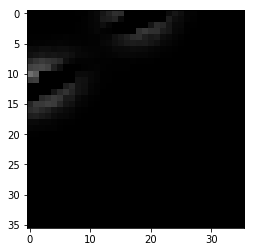

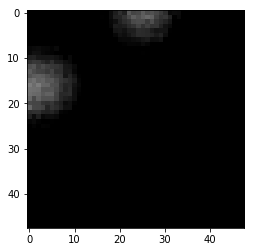

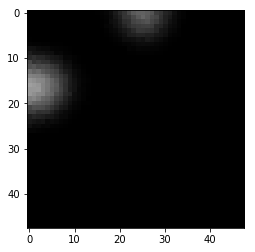

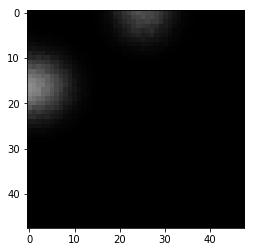

In [25]:
from src.utils.pipeline import Pipeline
lissom.cuda()
for inp, _ in train_loader:
    inp = torch.autograd.Variable(inp)
    inp = Pipeline.process_input(inp)
    inp = inp.cuda()
    act = lissom(inp)
    plot_matrix(np.reshape(act.data.cpu().numpy(), cortex_shape))
    break

In [ ]:
import src.supervised_gcal.utils.orientation_maps as om

keys_arrays = generate_all_inputs(size, orientations=25)
activations = om.calculate_keys_activations(lissom, keys_arrays)

In [ ]:
from src.utils.images import plot_array_matrix
from src.supervised_gcal.utils.images import images_matrix
plot_array_matrix(map(lambda x:x.view(cortex_size, cortex_size).cpu().numpy(), list(activations.values())))

In [ ]:
from src.supervised_gcal.utils.orientation_maps import get_orientation_map
orientation_map = get_orientation_map(activations, cortex_shape)
%matplotlib inline
plt.figure(figsize=(5, 5))
plt.colorbar()

In [ ]:
from collections import Counter

plt.show()

print("Promedio: {}".format(np.mean(normalized)))
print("Standard deviation: {}".format(np.std(normalized)))